# Fraud detection

## Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content*
The data is from a Kaggle dataset which contained 285,000 rows of data and 31 columns. Out of all the columns, the features Time, Amount, and Class (fraud or not fraud) are unencrypted. The other 28 columns were transformed using a PCA dimensionality reduction in order to be complianed with data privacy protection. The dataset represents a 2 days period, which is rather short. Transactions were made by European cardholders.

*https://www.kaggle.com/mlg-ulb/creditcardfraud

# Load Dependencies

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


sns.set_style("whitegrid")

In [38]:
data = pd.read_csv('./creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [40]:
#Check if dataset has empty entries
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [41]:
#see all columns of the dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The only non-transformed variables to work with are:

- Time
- Amount
- Class (1:fraud, 0:not_fraud)

In [42]:
#check transactions with frau-not_fraud
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Exploratory Data Analysis¶

## Time

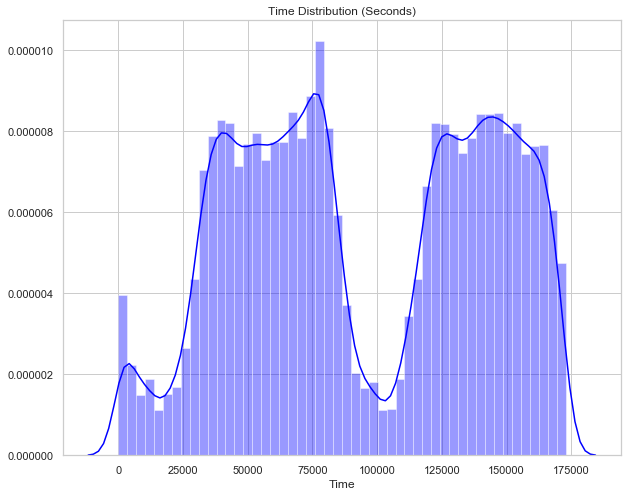

In [47]:
#plot the time feature
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'], color='blue');
plt.show()

## Amount

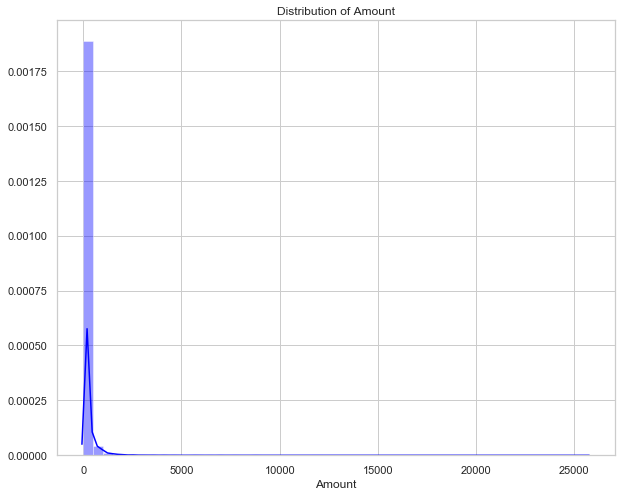

In [46]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');
plt.show()

## Fraud vs. Not Fraud

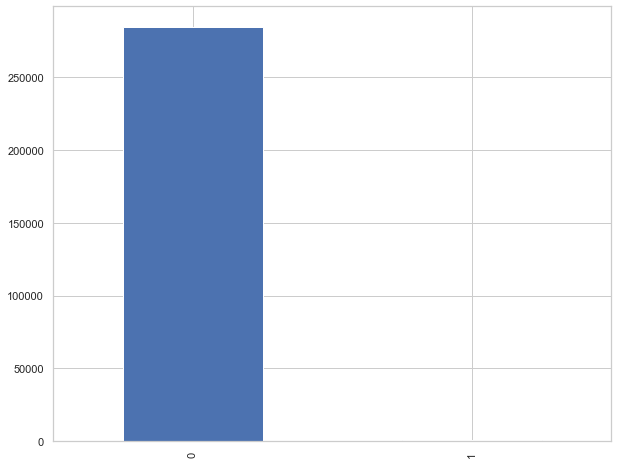

In [48]:
data.Class.value_counts().plot(kind='bar', figsize=(10,8))
plt.show()

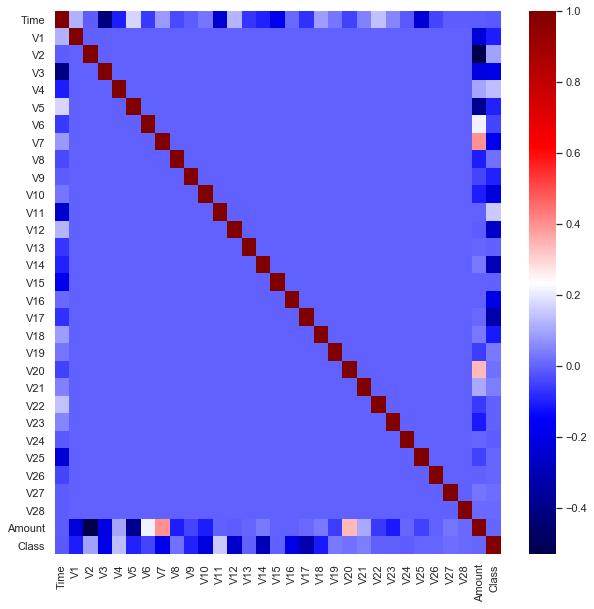

In [49]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

In [56]:
c = data.corr().abs()

s = c.unstack()
so = s.sort_values(ascending=False,kind="quicksort",)

In [76]:
#Highest correlations come from:
print(so[31:41])

Amount  V2       0.53
V2      Amount   0.53
Time    V3       0.42
V3      Time     0.42
Amount  V7       0.40
V7      Amount   0.40
V5      Amount   0.39
Amount  V5       0.39
V20     Amount   0.34
Amount  V20      0.34
dtype: float64


In [77]:
#assing features and target to X and y
X = data.drop('Class', axis=1)
y = data.Class

# Baseline - Logistic Regression

In [84]:
x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)

logistic_grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train, y_train)

y_pred = logistic_grid.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


In [85]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[56855     9]
 [   41    57]]
0.9991222218320986


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [87]:
score = cross_val_score(log_reg, X_std, y, cv=10)
score

array([0.99866578, 0.99887644, 0.99975422, 0.99894667, 0.99887644,
       0.99908711, 0.99961378, 0.99908708, 0.99922753, 0.99901685])

# Deep Learning

In [89]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [94]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [95]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [131]:
model = Sequential([
    Dense(units=16, input_dim=30, activation="relu"),
    Dense(units=32, activation="relu"),  
    Dropout(0.5),  
    Dense(64, activation="relu"),  
    Dense(64, activation="relu"), 
    Dropout(0.5),
    Dense(32,activation='relu'),
    Dense(1, activation="sigmoid"),  
])

In [132]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_37 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)               

In [133]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size=50, epochs=10,validation_split=0.1,)

Train on 205060 samples, validate on 22785 samples
Epoch 1/10
205060/205060 [==============================] - 12s 58us/step - loss: 0.0122 - accuracy: 0.9979 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 2/10
205060/205060 [==============================] - 11s 52us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 3/10
205060/205060 [==============================] - 12s 56us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 4/10
205060/205060 [==============================] - 11s 55us/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 5/10
205060/205060 [==============================] - 11s 56us/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 6/10
205060/205060 [==============================] - 12s 56us/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 7/10
205060/205060 [=======================

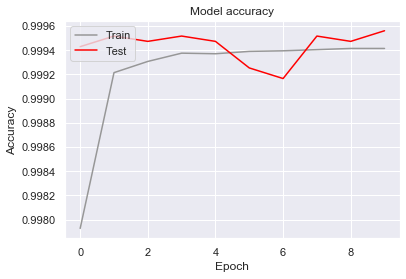

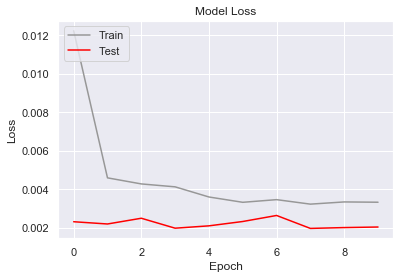

In [134]:
color_gray= '#979797'
color_red = '#FF0000'
title_acc = 'Model accuracy'
plt.plot(hist.history['accuracy'],color=color_gray)
plt.plot(hist.history['val_accuracy'],color=color_red)
plt.title(title_acc)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
title_loss = 'Model Loss'
plt.plot(hist.history['loss'],color=color_gray)
plt.plot(hist.history['val_loss'],color=color_red)
plt.title(title_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [135]:
score = model.evaluate(X_test, y_test)
print(score)

56962/56962 [==============================] - 2s 38us/step
[0.003407635749891202, 0.9992451071739197]


In [136]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [137]:
print(confusion_matrix(y_test, y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

[[56855     9]
 [   34    64]]
0.9992451107756047


Each row: actual class

Each column: predicted class

First row: Non-fraudulent, the negative class:

- 56849 were correctly classified as Non-fraudulent. True negatives.
- Remaining 15 were wrongly classified as fraud. False positive

Second row: The fraud transactions, the positive class:
- 19 were incorrectly classified as Non-fraudulent. False negatives
- 79 were correctly classified as Fraud. True positives

## Accuracy, Recall, Precision, and F1 Score
For this section, I’ll be using these abbreviations in the formulas:

- TP = True Positive. Fraudulent transactions the model predicts as fraudulent.
- TN = True Negative. Normal transactions the model predicts as normal.
- FP = False Positive. Normal transactions the model predicts as fraudulent.
- FN = False Negative. Fraudulent transactions the model predicts as normal.

<img src="scoring.png">

In [138]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.65      0.75        98

    accuracy                           1.00     56962
   macro avg       0.94      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [144]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix'):
    print(cm)
    sns.heatmap(cm, annot=True)
    sns.set(font_scale=1)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[56855     9]
 [   34    64]]


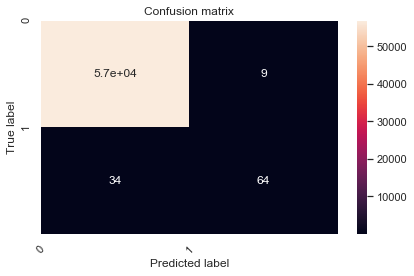

In [145]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred.round()), classes=[0,1])